In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def process(df,file_name,dir_path):
    # estrazione delle colonne TIMESTAMP e POWER
    df = df[['timestamp', 'power']]
            
    # conversione data dal formato unixtime
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms').dt.tz_localize("GMT").dt.tz_convert('Europe/Rome')
            
    # arrotondamento dal ms al secondo più vicino
    df['date'] = df['date'].dt.round('1s')
            
    df = df[['date', 'power']]
            
    # creazione time series settando la data come index
    df = df.set_index('date')
   
    # osservazioni duplicate sul secondo: potenza sostituita con la media tra le 2 potenze
    df = df.groupby('date').mean()
                        
    # crea nel range delle date eventuali nuovi timestamp, in modo da avere timestamp ogni secondo
    df = df.reindex(pd.date_range(start=df.index[0], end=df.index[-1], freq='1s'))
                        
    # sostituisce i valori NAN dei timestamp mancanti propagando l'ultimo valore disponibile
    df = df.fillna(method='ffill')
        
    plot_dir = os.path.join(os.path.abspath('..'),'plotPerSecond_Day_4_JAN')        
    if not os.path.exists(plot_dir):
        os.mkdir(plot_dir)
    dir_EB = os.path.join(plot_dir,dir_path)
    if not os.path.exists(dir_EB):
        os.mkdir(dir_EB)
    df.iloc[259200:345600].plot()
    path_plot = os.path.join(dir_EB,file_name + ".png")
    plt.savefig(path_plot)
    plt.show()
 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


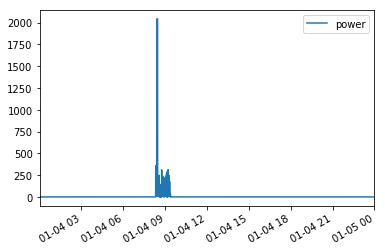

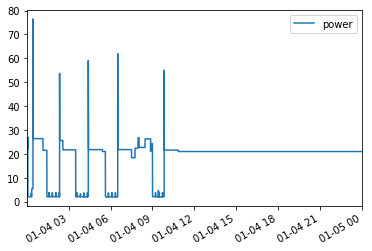

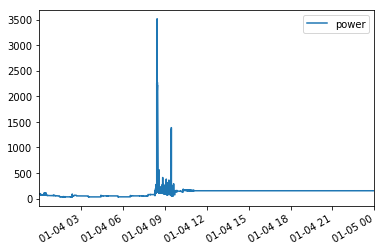

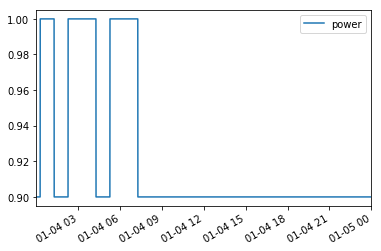

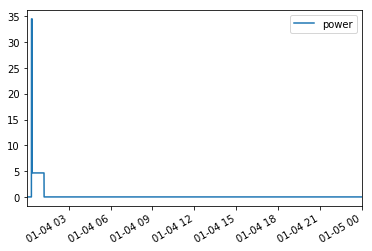

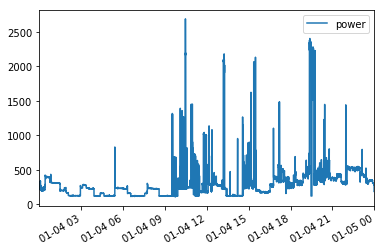

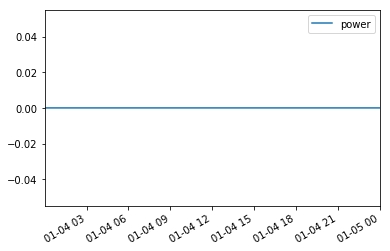

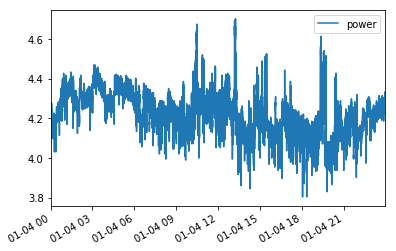

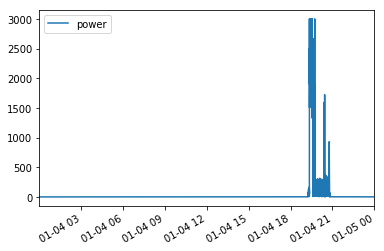

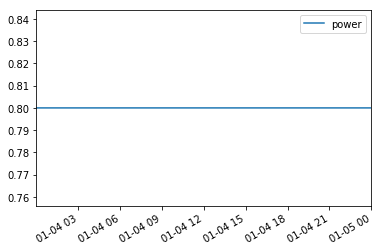

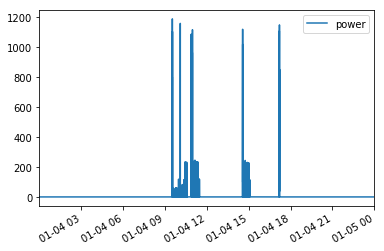

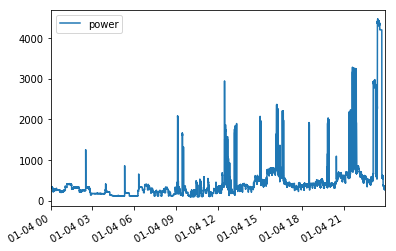

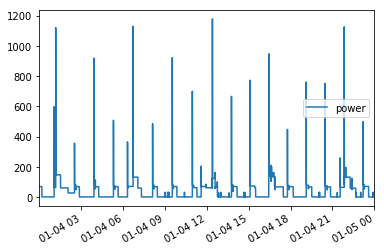

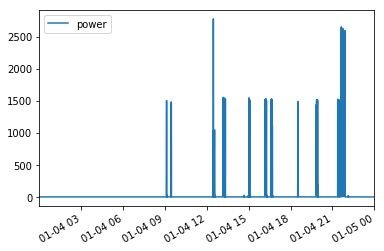

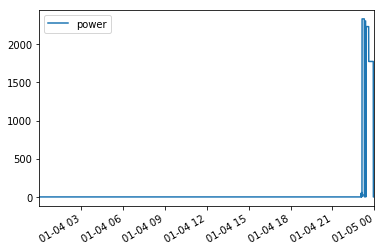

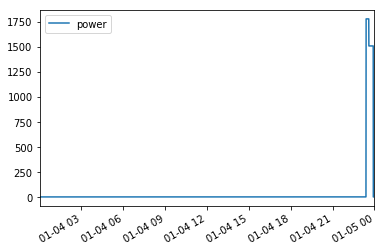

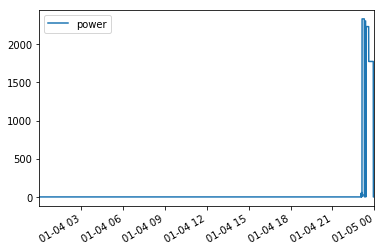

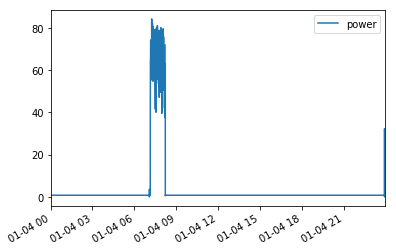

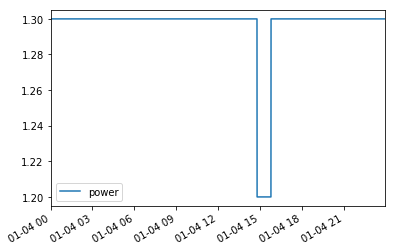

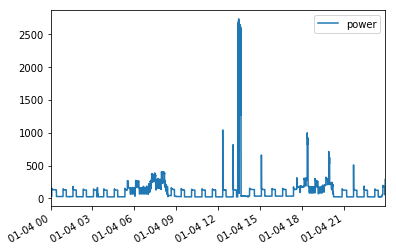

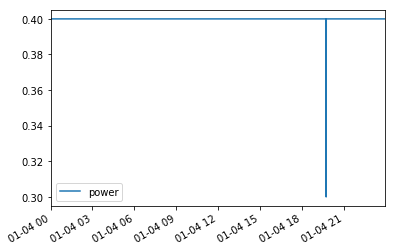

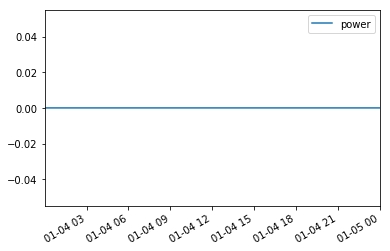

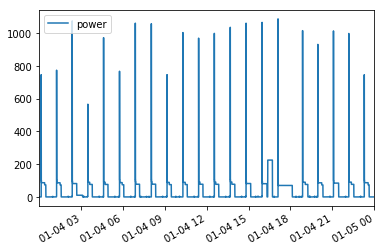

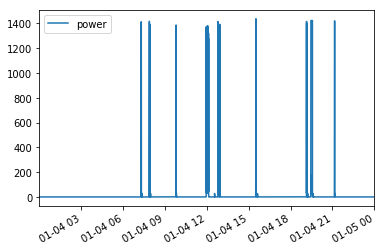

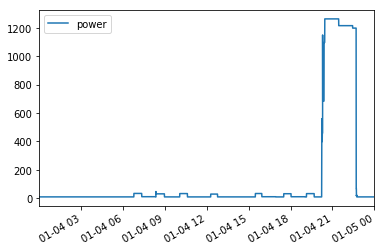

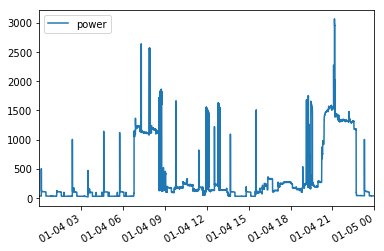

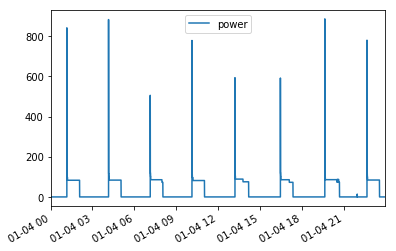

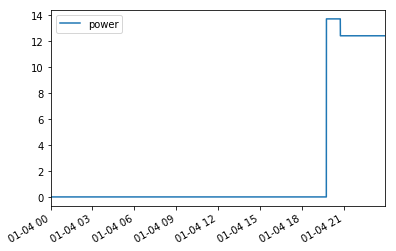

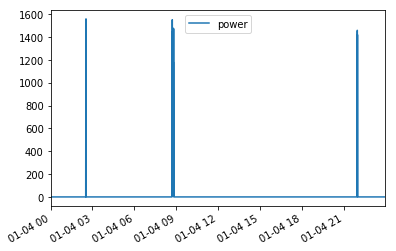

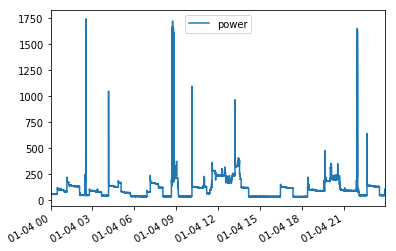

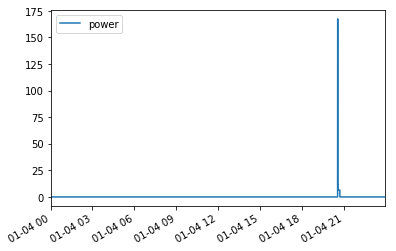

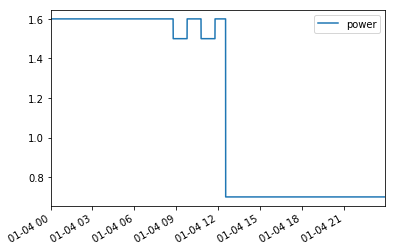

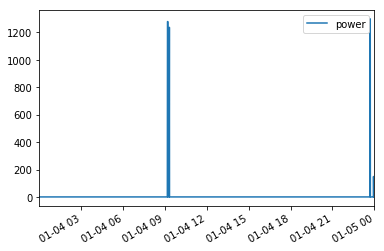

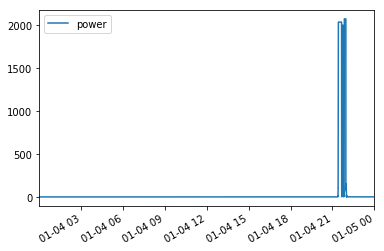

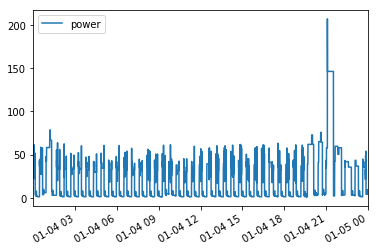

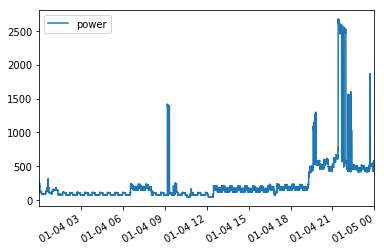

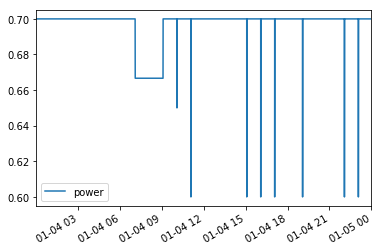

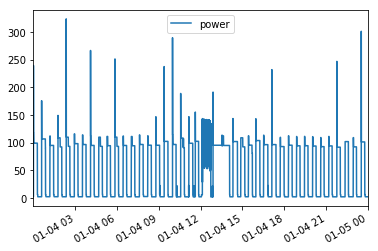

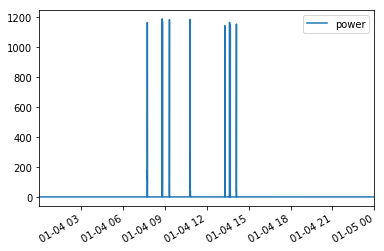

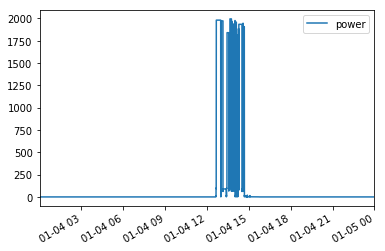

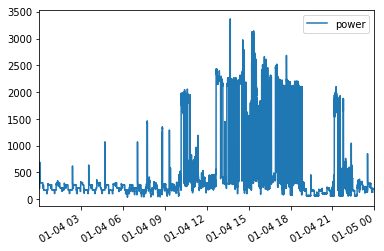

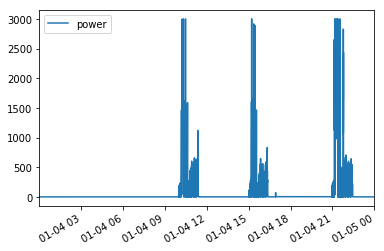

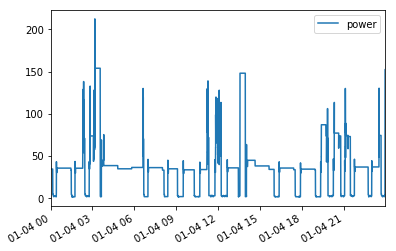

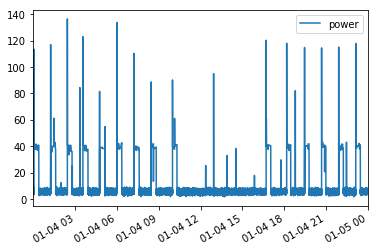

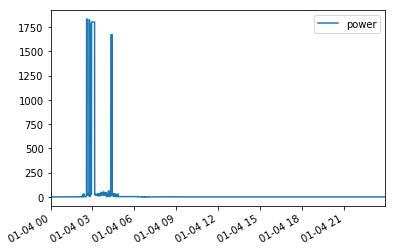

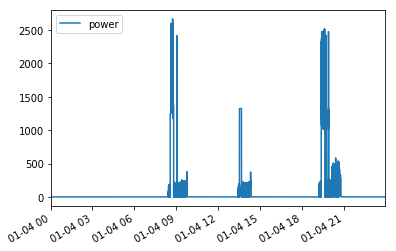

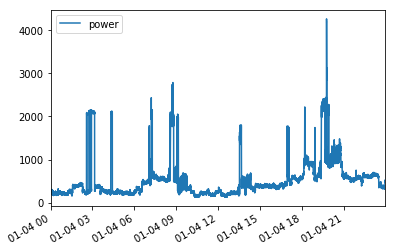

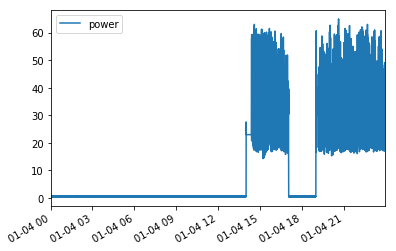

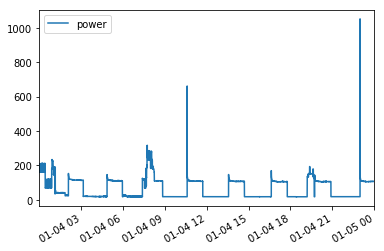

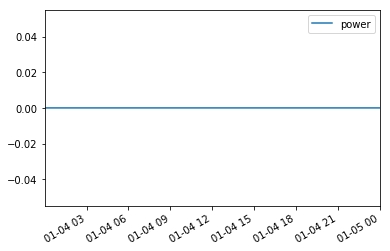

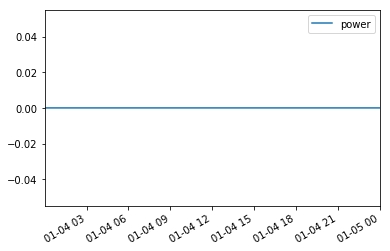

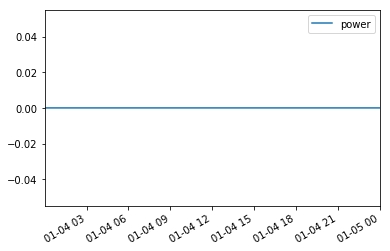

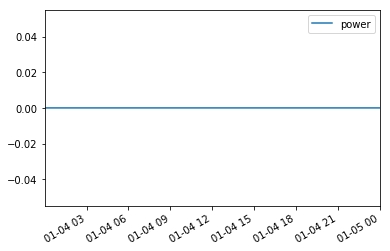

In [3]:
PATH = '../Dati puntuali Smart Homes Gennaio-Giugno 2019'

for r,dir,f in os.walk(PATH):
    for d in dir:
        DIR_PATH = d
        p = os.path.join(r,DIR_PATH)
        for r1,d1,f1 in os.walk(p):
            for file in f1 :
                chunksize = 500
                file_path = os.path.join(PATH,DIR_PATH,file)
                df = pd.read_csv(file_path, sep=';', chunksize=chunksize, iterator=True)
                df = pd.concat(df, ignore_index=True)
                file_name = file.split('.')[0]
                process(df,file_name,DIR_PATH)